In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#загрузим данные
df = pd.read_excel('ЭМ ИССЛЕДОВАНИЕ 2.xlsx', sheet_name = 'приведение к базисным ценам')
df.head()

,Год,Y,X_врп,X_иок,X_нас,X_юрл
0,2010,7561.773000,625914.900000,156518.000000,2763135,50752
1,2011,8572.310628,692728.826017,198062.585400,2755459,50410
2,2012,7602.971085,630417.865821,235039.224114,2744931,51950
3,2013,7591.044100,549125.466856,178981.308517,2735475,51218
4,2014,7312.545852,573384.463798,176089.746203,2725515,52262


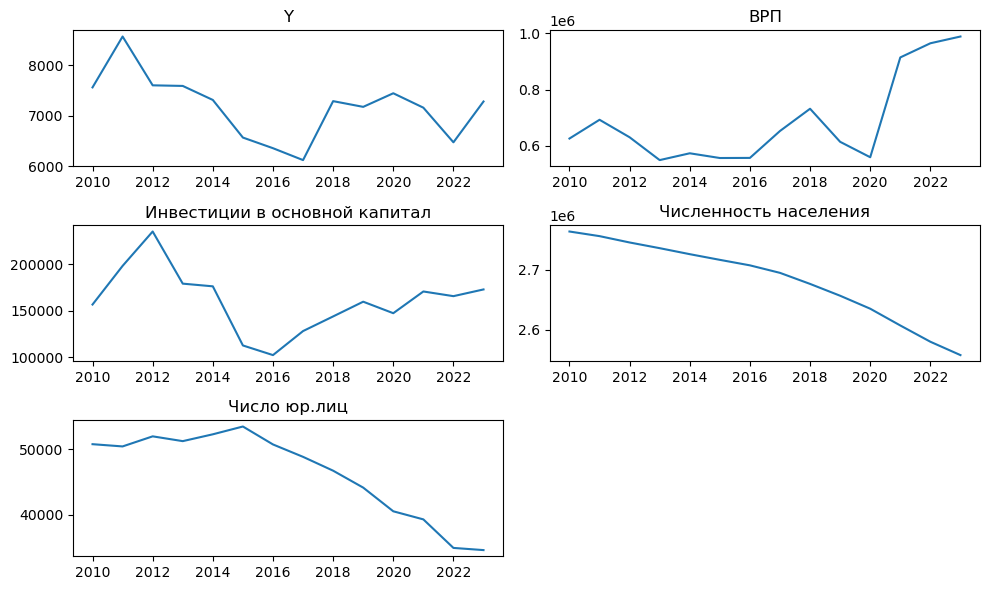

In [10]:
#выделим временную переменную
years = df['Год']

#построим графики для каждой переменной
plt.figure(figsize=(10, 6))

plt.subplot(3, 2, 1)
plt.plot(years, df['Y'])
plt.title('Y')

plt.subplot(3, 2, 2)
plt.plot(years, df['X_врп'])
plt.title('ВРП')

plt.subplot(3, 2, 3)
plt.plot(years, df['X_иок'])
plt.title('Инвестиции в основной капитал')

plt.subplot(3, 2, 4)
plt.plot(years, df['X_нас'])
plt.title('Численность населения')

plt.subplot(3, 2, 5)
plt.plot(years, df['X_юрл'])
plt.title('Число юр.лиц')

plt.tight_layout()
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

#функция для применения теста Дики-Фуллера и вывода результатов
def adf_test(series, name):
    result = adfuller(series)
    print(f'Тест Дики-Фуллера для переменной {name}:')
    print('Статистика ADF:', result[0])
    print('p-value:', result[1])
    print('Критические значения:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Результат: Временной ряд стационарен на уровне доверия 95%")
    else:
        print("Результат: Временной ряд нестационарен")

#применяем тест Дики-Фуллера к каждой переменной
for column in df.columns[1:]:
    adf_test(df[column], column)

Тест Дики-Фуллера для переменной Y:
Статистика ADF: -44.791584164794436
p-value: 0.0
Критические значения:
   1%: -4.6651863281249994
   5%: -3.3671868750000002
   10%: -2.802960625
Результат: Временной ряд стационарен на уровне доверия 95%
Тест Дики-Фуллера для переменной X_врп:
Статистика ADF: 1.656185414891282
p-value: 0.9980167193002388
Критические значения:
   1%: -4.6651863281249994
   5%: -3.3671868750000002
   10%: -2.802960625
Результат: Временной ряд нестационарен
Тест Дики-Фуллера для переменной X_иок:
Статистика ADF: -1.6671448716712893
p-value: 0.44811493553079806
Критические значения:
   1%: -4.068853732362312
   5%: -3.1271488757396453
   10%: -2.7017297633136095
Результат: Временной ряд нестационарен
Тест Дики-Фуллера для переменной X_нас:
Статистика ADF: 9.012978319300586
p-value: 1.0
Критические значения:
   1%: -4.6651863281249994
   5%: -3.3671868750000002
   10%: -2.802960625
Результат: Временной ряд нестационарен
Тест Дики-Фуллера для переменной X_юрл:
Статистика 

Хорошо, давайте применим разностное преобразование к каждой переменной и проверим стационарность полученных рядов. Мы будем вычитать из каждого значения текущего года значение предыдущего года.

Тест Дики-Фуллера для переменной Y (Diff):
Статистика ADF: -4.7200679824258875
p-value: 7.714364878629058e-05
Критические значения:
   1%: -4.137829282407408
   5%: -3.1549724074074077
   10%: -2.7144769444444443
Результат: Временной ряд стационарен на уровне доверия 95%
Тест Дики-Фуллера для переменной X_врп (Diff):
Статистика ADF: -3.19721777721172
p-value: 0.02014629108837424
Критические значения:
   1%: -4.223238279489106
   5%: -3.189368925619835
   10%: -2.729839421487603
Результат: Временной ряд стационарен на уровне доверия 95%
Тест Дики-Фуллера для переменной X_иок (Diff):
Статистика ADF: -3.345075733224907
p-value: 0.012979955309734725
Критические значения:
   1%: -4.137829282407408
   5%: -3.1549724074074077
   10%: -2.7144769444444443
Результат: Временной ряд стационарен на уровне доверия 95%
Тест Дики-Фуллера для переменной X_нас (Diff):
Статистика ADF: -1.185387942983294
p-value: 0.679849654365803
Критические значения:
   1%: -4.6651863281249994
   5%: -3.3671868750000002

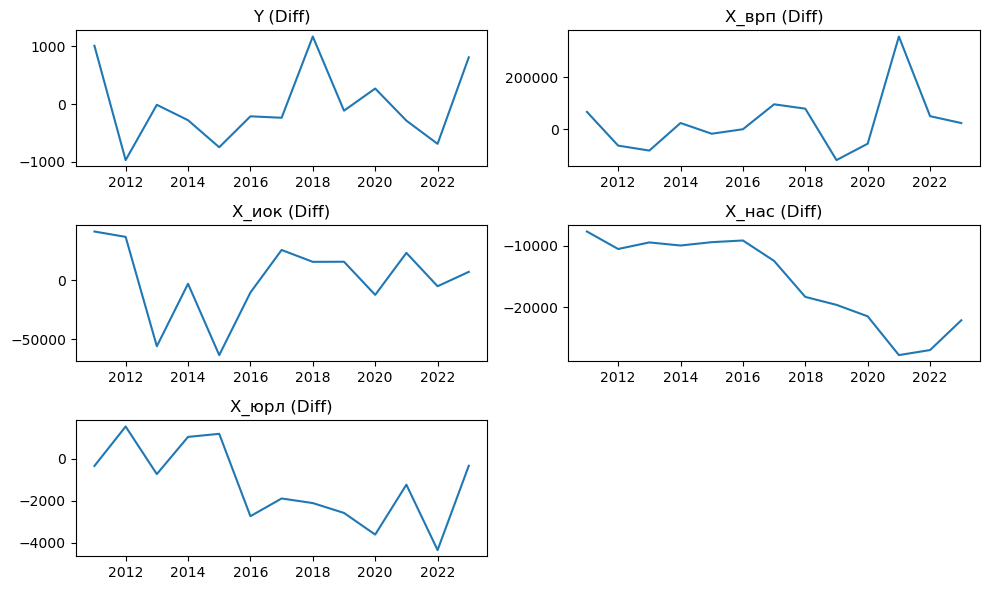

In [12]:
#применяем разностное преобразование к каждой переменной
df_diff = df.diff().dropna()

#повторно выполняем тест Дики-Фуллера для каждой переменной
for column in df_diff.columns[1:]:
    adf_test(df_diff[column], f'{column} (Diff)')

#визуализируем новые временные ряды
plt.figure(figsize=(10, 6))

plt.subplot(3, 2, 1)
plt.plot(years[1:], df_diff['Y'])
plt.title('Y (Diff)')

plt.subplot(3, 2, 2)
plt.plot(years[1:], df_diff['X_врп'])
plt.title('X_врп (Diff)')

plt.subplot(3, 2, 3)
plt.plot(years[1:], df_diff['X_иок'])
plt.title('X_иок (Diff)')

plt.subplot(3, 2, 4)
plt.plot(years[1:], df_diff['X_нас'])
plt.title('X_нас (Diff)')

plt.subplot(3, 2, 5)
plt.plot(years[1:], df_diff['X_юрл'])
plt.title('X_юрл (Diff)')

plt.tight_layout()
plt.show()

In [13]:
import numpy as np
#применяем логарифмическое преобразование к переменным X_врп и X_нас
df_log = df.copy()
df_log['X_нас'] = np.log(df_log['X_нас'])

#повторно выполняем тест Дики-Фуллера для переменных X_врп и X_нас после логарифмического преобразования
adf_test(df_log['X_нас'], 'X_нас (Log)')

Тест Дики-Фуллера для переменной X_нас (Log):
Статистика ADF: 9.908348727348878
p-value: 1.0
Критические значения:
   1%: -4.6651863281249994
   5%: -3.3671868750000002
   10%: -2.802960625
Результат: Временной ряд нестационарен


In [14]:
import statsmodels.api as sm

#функция для построения нелинейного тренда с помощью LOESS
def fit_loess(series):
    lowess = sm.nonparametric.lowess
    x = np.arange(len(series))
    fit = lowess(series, x, frac=0.3)
    return fit[:, 1]

#построение нелинейного тренда для переменных X_врп и X_нас
trend_nas = fit_loess(df['X_нас'])

#вычитание тренда из исходных данных
df_detrended = df.copy()
df_detrended['X_нас'] -= trend_nas

#повторное выполнение теста Дики-Фуллера для переменных X_врп и X_нас после удаления тренда
adf_test(df_detrended['X_нас'], 'X_нас (Detrended)')


Тест Дики-Фуллера для переменной X_нас (Detrended):
Статистика ADF: -3.7401618332306734
p-value: 0.0035824253418456015
Критические значения:
   1%: -4.137829282407408
   5%: -3.1549724074074077
   10%: -2.7144769444444443
Результат: Временной ряд стационарен на уровне доверия 95%


In [15]:
#создадим итоговый датасет с преобразованными данными
df_final = pd.concat([df['Год'], df_diff['Y'], df_diff['X_врп'], df_diff['X_иок'], df_detrended['X_нас'], df_diff['X_юрл'] ], axis=1)
df_final = df_final.iloc[1:, :]

#повторная проверка на стационарность каждой переменной в df_final
for column in df_final.columns[1:]:
    adf_test(df_final[column], f'{column} (Final without 2010)')

Тест Дики-Фуллера для переменной Y (Final without 2010):
Статистика ADF: -4.7200679824258875
p-value: 7.714364878629058e-05
Критические значения:
   1%: -4.137829282407408
   5%: -3.1549724074074077
   10%: -2.7144769444444443
Результат: Временной ряд стационарен на уровне доверия 95%
Тест Дики-Фуллера для переменной X_врп (Final without 2010):
Статистика ADF: -3.19721777721172
p-value: 0.02014629108837424
Критические значения:
   1%: -4.223238279489106
   5%: -3.189368925619835
   10%: -2.729839421487603
Результат: Временной ряд стационарен на уровне доверия 95%
Тест Дики-Фуллера для переменной X_иок (Final without 2010):
Статистика ADF: -3.345075733224907
p-value: 0.012979955309734725
Критические значения:
   1%: -4.137829282407408
   5%: -3.1549724074074077
   10%: -2.7144769444444443
Результат: Временной ряд стационарен на уровне доверия 95%
Тест Дики-Фуллера для переменной X_нас (Final without 2010):
Статистика ADF: -3.555630820827891
p-value: 0.006668173936586666
Критические знач

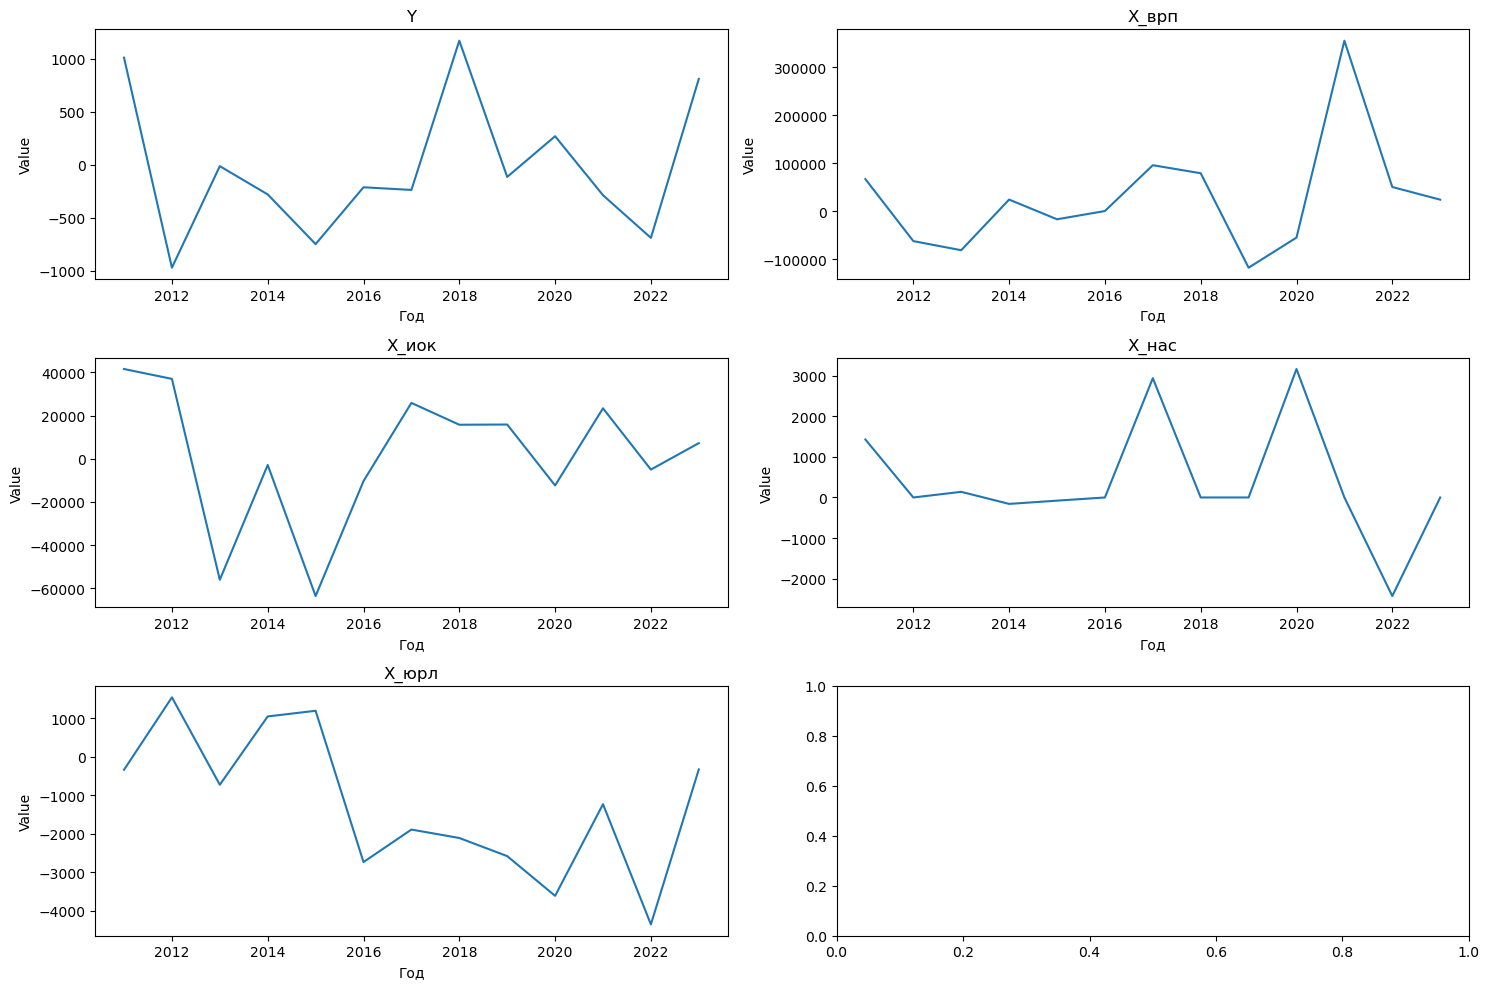

In [16]:
import matplotlib.pyplot as plt

# Создаем фигуру и оси для графиков
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Список переменных
variables = ["Y", "X_врп", "X_иок", "X_нас", "X_юрл"]

# Итерируемся по переменным и строим графики
for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    axes[row, col].plot(df_final['Год'], df_final[var])
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel('Год')
    axes[row, col].set_ylabel('Value')

# Устанавливаем расстояние между графиками
plt.tight_layout()

# Показываем графики
plt.show()


In [17]:
correlation_matrix = df_final.corr()
print(correlation_matrix)

            Год         Y     X_врп     X_иок     X_нас     X_юрл
Год    1.000000  0.108996  0.306726  0.038895 -0.166046 -0.603495
Y      0.108996  1.000000  0.099377  0.262559  0.302552 -0.161633
X_врп  0.306726  0.099377  1.000000  0.359592 -0.035816 -0.044110
X_иок  0.038895  0.262559  0.359592  1.000000  0.180723 -0.047961
X_нас -0.166046  0.302552 -0.035816  0.180723  1.000000 -0.032979
X_юрл -0.603495 -0.161633 -0.044110 -0.047961 -0.032979  1.000000


In [27]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Строим модели и проверяем значимость коэффициентов
for feature in ["X_врп", "X_иок", "X_нас", "X_юрл"]:
    X = sm.add_constant(df[["Год", feature]])  # Добавляем константу для расчета свободного члена
    y = df["Y"]
    
    model = sm.OLS(y, X).fit()
    
    print(f"Модель зависимости Y от Года и {feature}:")
    print(f"Коэффициенты: {model.params}")
    print(f"p-values: {model.pvalues}")
    print(f"Значимость коэффициентов: {['Значимо' if p < 0.05 else 'Не значимо' for p in model.pvalues[1:]]}")
    print("-" * 50)


Модель зависимости Y от Года и X_врп:
Коэффициенты: const    220126.660743
Год        -106.144505
X_врп         0.001591
dtype: float64
p-values: const    0.055683
Год      0.063027
X_врп    0.271025
dtype: float64
Значимость коэффициентов: ['Не значимо', 'Не значимо']
--------------------------------------------------
Модель зависимости Y от Года и X_иок:
Коэффициенты: const    93182.969825
Год        -43.581745
X_иок        0.011705
dtype: float64
p-values: const    0.165993
Год      0.188309
X_иок    0.010736
dtype: float64
Значимость коэффициентов: ['Не значимо', 'Значимо']
--------------------------------------------------
Модель зависимости Y от Года и X_нас:
Коэффициенты: const    801339.581878
Год        -367.883609
X_нас        -0.019506
dtype: float64
p-values: const    0.042652
Год      0.042338
X_нас    0.080460
dtype: float64
Значимость коэффициентов: ['Значимо', 'Не значимо']
--------------------------------------------------
Модель зависимости Y от Года и X_юрл:
Коэффици

In [30]:
df.drop(columns=["X_нас", "X_врп"], inplace=True)

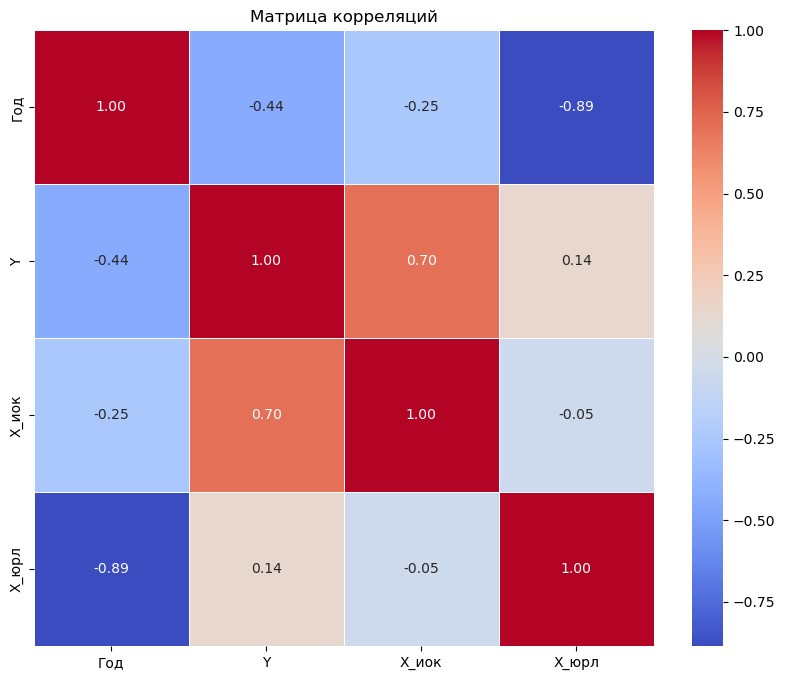

In [31]:
import seaborn as sns
# Вычислим матрицу корреляций
correlation_matrix = df.corr()

# Построим тепловую карту корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляций')
plt.show()